# COVID-19 - Supervised Learning and Regression

Faculdade de Engenharia da Universidade do Porto  
Inteligência Artificial 2019/2020


* João Pedro Ribeiro
* Ricardo Pinto
* Francisco Almeida

## Abstract
....

## Introduction
The spread of the novelty coronavirus, COVID-19, has been a subject of study as of late. Using available data regarding the virus, this paper aims to describe the process of training several machine learning models capable of predicting the evolution of cases through regression algorithms and evaluating their performance and accuracy.

## Problem Description
 This study uses two main datasets. The [first one](https://github.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning) contains the data related to COVID-19 worldwide, from 2020/01/22 to 2020/05/16. The [second one](https://www.kaggle.com/tanuprabhu/population-by-country-2020/metadata) contains data related to each country's population which is used later on to calculate the number of cases per million inhabitants.
To help write this paper, a toolbox was developed in Python to perform transformations on the data, train models and make predictions.

## Aproach
This section describes the steps performed to conduct the study. The goal is to predict the total number of confirmed cases, deaths and recovered cases of COVID-19 worldwide. In order to validate the accuracy of the trained models, these will be trained with data until 2020/04/16 and then make predictions first between 2020/04/17 and 2020/05/01 and then between 2020/05/02 and 2020/05/16. After analysing these results, we will use these models to predict the spread of the virus in the near future.

### Data cleaning
The following transformations were applied on the COVID-19 dataset using the developed toolbox:
* Replaced missing values on the Province/State column with the value of the Country/Region column, prefixed with "NA_"
* Transformed the Date column to instead contain the number of days since the first day the data started being collected (2020-01-22)
* Merge with the population dataset to contain population of each country, as well as the number of Confirmed, Deaths and Recovered cases divided by the number of millions of inhabitants of each country.

Please not that the Population column refers to the population of each Country/Region and not to the population of the Province/State.  
The toolbox command used to make these transformations is as follows:

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pickle
import os
from datetime import datetime
import toolbox.utils as utils
from toolbox.encoder import Encoder
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline
sb.set()

le = Encoder()

df = pd.read_csv('data/covid_16_05.csv')
print(df)

                 Province/State         Country/Region        Lat       Long  \
0                NA_Afghanistan            Afghanistan  33.000000  65.000000   
1                    NA_Albania                Albania  41.153300  20.168300   
2                    NA_Algeria                Algeria  28.033900   1.659600   
3                    NA_Andorra                Andorra  42.506300   1.521800   
4                     NA_Angola                 Angola -11.202700  17.873900   
...                         ...                    ...        ...        ...   
30503  NA_Sao Tome and Principe  Sao Tome and Principe   0.186360   6.613081   
30504                  NA_Yemen                  Yemen  15.552727  48.516388   
30505                NA_Comoros                Comoros -11.645500  43.333300   
30506             NA_Tajikistan             Tajikistan  38.861034  71.276093   
30507                NA_Lesotho                Lesotho -29.609988  28.233608   

             Date  Confirmed  Deaths  R

Next, several more datasets were prepared from the previous one, using the developed toolbox. These can be found inside the `data/` directory.
* `covid_16_04` - COVID-19 worldwide data until 2020/04/16.
* `covid_17_04_01_05` - COVID-19 worldwide data from 2020/04/17 to 2020/01/05. Used to validate the accuracy of the predictions for this date interval.
* `covid_17_04_01_05_test_confirmed` - COVID-19 worldwide data from 2020/04/17 to 2020/01/05 without the Confirmed column. Used to predict values of the Confirmed column.
* `covid_17_04_01_05_test_deaths` - COVID-19 worldwide data from 2020/04/17 to 2020/01/05 without the Deaths column. Used to predict values of the Deaths column.
* `covid_17_04_01_05_test_recovered` - COVID-19 worldwide data from 2020/04/17 to 2020/01/05 without the Recovered column. Used to predict values of the Recovered column.
* `covid_02_05_16_05` - COVID-19 worldwide data from 2020/05/02 to 2020/05/16. Used to validate the accuracy of the predictions for this date interval.
* `covid_02_05_16_05_test_confirmed.csv` - COVID-19 worldwide data from 2020/05/02 to 2020/05/16 without the Confirmed column. Used to predict values of the Confirmed column.
* `covid_02_05_16_05_test_deaths.csv` - COVID-19 worldwide data from 2020/05/02 to 2020/05/16 without the Deaths column. Used to predict values of the Deaths column.
* `covid_02_05_16_05_test_recovered.csv` - COVID-19 worldwide data from 2020/05/02 to 2020/05/16 without the Recovered column. Used to predict values of the Recovered column.

### Training
Using the developed toolbox, we can now train machine learning models to predict the number of confirmed cases, deaths and recovered cases. The toolbox currently supports several algorithms from the sklearn library. However, for this study, only 3 will be used: Ridge Regression, Random Forest and ??. To make training models easier, the toolbox supports GridSearchCV, which takes a parameter grid and tries to find the best combination of parameters that make the model more accurate.

#### Ridge Regression - Confirmed
Below, we find the toolbox command ran to train the model and its respective output

```
> python3 -m toolbox train data/covid_16_04.csv Ridge Confirmed 0.3 -s models/confirmed_ridge.p -gs params_ridge.json
R2 Score:  0.7725714805193531
Mean Absolute Error: 1159.9238505379778
Mean Squared Error: 58330171.87048936
{'mean_fit_time': array([0.00374241, 0.00297608, 0.00328918, 0.0027667 , 0.00259919,
       0.00269313, 0.00320759, 0.00260649, 0.00269608, 0.00280528]), 'std_fit_time': array([2.11988612e-03, 4.39803059e-04, 8.05424307e-04, 2.68772495e-04,
       5.70169246e-05, 4.45556712e-04, 5.56358724e-04, 3.51994317e-04,
       1.22988533e-04, 1.89327796e-04]), 'mean_score_time': array([0.00114064, 0.00110493, 0.00119109, 0.00108175, 0.00094895,
       0.00102468, 0.00109491, 0.00105772, 0.00100012, 0.00120988]), 'std_score_time': array([1.48758704e-04, 9.26346971e-05, 2.30527091e-04, 1.43873821e-04,
       2.78688374e-05, 2.33428227e-05, 6.09304976e-05, 1.40040068e-04,
       5.01548829e-05, 1.94129631e-04]), 'param_alpha': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_normalize': masked_array(data=[True, False, True, False, True, False, True, False,
                   True, False],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.001, 'normalize': True}, {'alpha': 0.001, 'normalize': False}, {'alpha': 0.01, 'normalize': True}, {'alpha': 0.01, 'normalize': False}, {'alpha': 0.1, 'normalize': True}, {'alpha': 0.1, 'normalize': False}, {'alpha': 1, 'normalize': True}, {'alpha': 1, 'normalize': False}, {'alpha': 10, 'normalize': True}, {'alpha': 10, 'normalize': False}], 'split0_test_score': array([0.7371411 , 0.73680349, 0.73993461, 0.73680349, 0.75210376,
       0.73680349, 0.64784556, 0.73680349, 0.21358427, 0.7368035 ]), 'split1_test_score': array([0.73047259, 0.73086823, 0.72693033, 0.73086823, 0.69385279,
       0.73086823, 0.49802034, 0.73086823, 0.14252927, 0.73086821]), 'split2_test_score': array([0.74558032, 0.74536128, 0.74737756, 0.74536128, 0.75415898,
       0.74536128, 0.65113888, 0.74536128, 0.21734171, 0.74536128]), 'split3_test_score': array([0.78463539, 0.78488303, 0.78237036, 0.78488303, 0.75839878,
       0.78488303, 0.57921393, 0.78488303, 0.17503531, 0.78488302]), 'split4_test_score': array([0.60157732, 0.60061562, 0.60979664, 0.60061562, 0.66369742,
       0.60061562, 0.6930202 , 0.60061563, 0.26400623, 0.60061569]), 'mean_test_score': array([0.71988134, 0.71970633, 0.7212819 , 0.71970633, 0.72444235,
       0.71970633, 0.61384778, 0.71970633, 0.20249936, 0.71970634]), 'std_test_score': array([0.06206358, 0.06245907, 0.05868829, 0.06245907, 0.03854073,
       0.06245907, 0.06845472, 0.06245907, 0.04117512, 0.06245904]), 'rank_test_score': array([ 3,  8,  2,  7,  1,  6,  9,  5, 10,  4], dtype=int32)}
Best params:
{'alpha': 0.1, 'normalize': True}
```

#### Ridge Regression - Deaths
Below, we find the toolbox command ran to train the model and its respective output

```
> python3 -m toolbox train data/covid_16_04.csv Ridge Deaths 0.3 -s models/deaths_ridge.p -gs params_ridge.json
R2 Score:  0.8004889701479991
Mean Absolute Error: 60.97284815628974
Mean Squared Error: 132774.35317479173
{'mean_fit_time': array([0.00372472, 0.00283465, 0.00301638, 0.0024055 , 0.002912  ,
       0.00280833, 0.00278993, 0.00273967, 0.00331235, 0.00285664]), 'std_fit_time': array([0.00181383, 0.00034142, 0.00038509, 0.00011857, 0.00020318,
       0.00026189, 0.00025073, 0.00032103, 0.00045564, 0.00035336]), 'mean_score_time': array([0.00120106, 0.00106068, 0.00115438, 0.00106883, 0.00117617,
       0.00108428, 0.00102129, 0.00125661, 0.00110464, 0.00130196]), 'std_score_time': array([2.06629095e-04, 1.04110533e-04, 1.74677264e-04, 9.38538605e-05,
       1.60236542e-04, 1.26359184e-04, 5.10377502e-05, 1.54081470e-04,
       4.79605269e-05, 2.77052951e-04]), 'param_alpha': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_normalize': masked_array(data=[True, False, True, False, True, False, True, False,
                   True, False],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.001, 'normalize': True}, {'alpha': 0.001, 'normalize': False}, {'alpha': 0.01, 'normalize': True}, {'alpha': 0.01, 'normalize': False}, {'alpha': 0.1, 'normalize': True}, {'alpha': 0.1, 'normalize': False}, {'alpha': 1, 'normalize': True}, {'alpha': 1, 'normalize': False}, {'alpha': 10, 'normalize': True}, {'alpha': 10, 'normalize': False}], 'split0_test_score': array([0.70672365, 0.70643982, 0.70910867, 0.70643982, 0.72244475,
       0.70643982, 0.66377171, 0.70643982, 0.24342102, 0.70643982]), 'split1_test_score': array([0.78958605, 0.78972654, 0.7882978 , 0.78972654, 0.77435343,
       0.78972654, 0.64026443, 0.78972654, 0.2171383 , 0.78972655]), 'split2_test_score': array([0.77326432, 0.77344707, 0.77159046, 0.77344707, 0.7537765 ,
       0.77344707, 0.60561648, 0.77344707, 0.19985879, 0.77344707]), 'split3_test_score': array([0.7141074 , 0.71357366, 0.71848167, 0.71357366, 0.73942756,
       0.71357366, 0.67376452, 0.71357366, 0.24148056, 0.71357369]), 'split4_test_score': array([0.7705184 , 0.77055624, 0.77008056, 0.77055624, 0.7608123 ,
       0.77055624, 0.62929438, 0.77055624, 0.20679366, 0.77055622]), 'mean_test_score': array([0.75083996, 0.75074867, 0.75151183, 0.75074867, 0.75016291,
       0.75074867, 0.6425423 , 0.75074867, 0.22173847, 0.75074867]), 'std_test_score': array([0.03372501, 0.03397672, 0.0315917 , 0.03397672, 0.01786165,
       0.03397672, 0.024371  , 0.03397672, 0.01779389, 0.03397671]), 'rank_test_score': array([ 2,  7,  1,  6,  8,  5,  9,  4, 10,  3], dtype=int32)}
Best params:
{'alpha': 0.01, 'normalize': True}
```

#### Ridge Regression - Recovered
Below, we find the toolbox command ran to train the model and its respective output

```
> python3 -m toolbox train data/covid_16_04.csv Ridge Recovered 0.3 -s models/recovered_ridge.p -gs params_ridge.json
R2 Score:  0.41138069941617394
Mean Absolute Error: 500.2125046798285
Mean Squared Error: 9501856.922722798
{'mean_fit_time': array([0.00381088, 0.00259399, 0.00275073, 0.00240402, 0.0029098 ,
       0.00254421, 0.00246878, 0.00263863, 0.00323639, 0.00256624]), 'std_fit_time': array([1.76549806e-03, 2.20885414e-04, 2.94639243e-04, 2.27384207e-04,
       4.08692163e-04, 2.40344821e-04, 3.41204893e-05, 3.63354714e-04,
       4.43200800e-04, 3.99443519e-04]), 'mean_score_time': array([0.00130191, 0.00109835, 0.00106297, 0.00100522, 0.00101113,
       0.0010932 , 0.00096703, 0.00102015, 0.00112853, 0.00104685]), 'std_score_time': array([2.86240409e-04, 2.01406183e-04, 1.57301243e-04, 5.55222356e-05,
       5.19185676e-05, 1.26819358e-04, 3.17227545e-05, 5.88389617e-05,
       9.87295453e-05, 8.34969504e-05]), 'param_alpha': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_normalize': masked_array(data=[True, False, True, False, True, False, True, False,
                   True, False],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.001, 'normalize': True}, {'alpha': 0.001, 'normalize': False}, {'alpha': 0.01, 'normalize': True}, {'alpha': 0.01, 'normalize': False}, {'alpha': 0.1, 'normalize': True}, {'alpha': 0.1, 'normalize': False}, {'alpha': 1, 'normalize': True}, {'alpha': 1, 'normalize': False}, {'alpha': 10, 'normalize': True}, {'alpha': 10, 'normalize': False}], 'split0_test_score': array([0.51850519, 0.51853474, 0.51817604, 0.51853474, 0.51151481,
       0.51853474, 0.42176913, 0.51853474, 0.14427222, 0.51853474]), 'split1_test_score': array([0.36400827, 0.36375526, 0.36605326, 0.36375526, 0.37377079,
       0.36375526, 0.31975635, 0.36375526, 0.11151679, 0.36375528]), 'split2_test_score': array([0.43584795, 0.43577704, 0.43642431, 0.43577704, 0.4383725 ,
       0.43577704, 0.39225791, 0.43577704, 0.14402859, 0.43577703]), 'split3_test_score': array([0.55553612, 0.55557388, 0.5550935 , 0.55557388, 0.54654979,
       0.55557388, 0.45137637, 0.55557388, 0.15101468, 0.55557388]), 'split4_test_score': array([0.42750912, 0.42722005, 0.43004088, 0.42722005, 0.4510918 ,
       0.42722005, 0.49685902, 0.42722005, 0.2094217 , 0.42722005]), 'mean_test_score': array([0.46028133, 0.46017219, 0.4611576 , 0.46017219, 0.46425994,
       0.46017219, 0.41640375, 0.46017219, 0.1520508 , 0.4601722 ]), 'std_test_score': array([0.06841491, 0.06853446, 0.06737934, 0.06853446, 0.06006078,
       0.06853446, 0.05941155, 0.06853446, 0.03181309, 0.06853446]), 'rank_test_score': array([ 3,  8,  2,  7,  1,  6,  9,  5, 10,  4], dtype=int32)}
Best params:
{'alpha': 0.1, 'normalize': True}
```

## Experimental Evaluation
This section presents the results of the predictions made by the trained models. For each model, we compare the predicted number of confirmed cases, deaths and recovered cases with their actual values and also compare the predictions for the two previously mentioned date intervals.

In [2]:
covid_17_04_01_05 = pd.read_csv('data/covid_17_04_01_05.csv')
covid_17_04_01_05_test_confirmed = pd.read_csv('data/covid_17_04_01_05_test_confirmed.csv')
covid_17_04_01_05_test_deaths = pd.read_csv('data/covid_17_04_01_05_test_deaths.csv')
covid_17_04_01_05_test_recovered = pd.read_csv('data/covid_17_04_01_05_test_recovered.csv')
covid_02_05_16_05 = pd.read_csv('data/covid_02_05_16_05.csv')
covid_02_05_16_05_test_confirmed = pd.read_csv('data/covid_02_05_16_05_test_confirmed.csv')
covid_02_05_16_05_test_deaths = pd.read_csv('data/covid_02_05_16_05_test_deaths.csv')
covid_02_05_16_05_test_recovered = pd.read_csv('data/covid_02_05_16_05_test_recovered.csv')


R2 Score:  0.8775034197003977
Mean Absolute Error: 5634.1883374534345
Mean Square Error 461082371.23238313


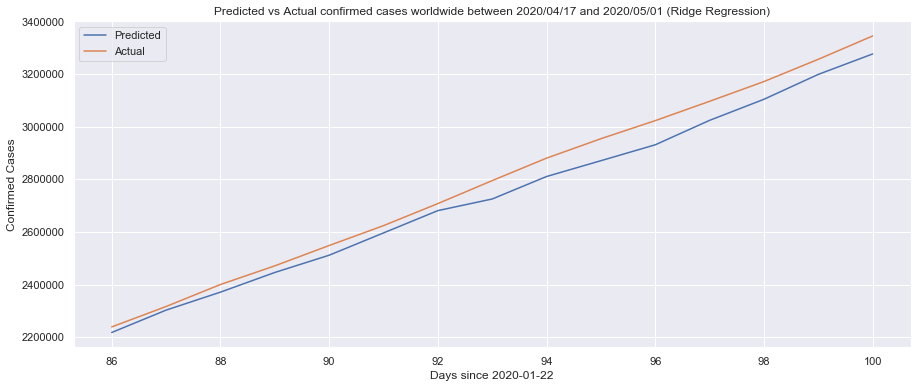

In [3]:
model = pickle.load(open('models/confirmed_ridge.p', 'rb'))
covid_17_04_01_05_confirmed_predictions_ridge = utils.predict_values(model, covid_17_04_01_05_test_confirmed, 'Confirmed')

utils.calc_metrics(covid_17_04_01_05['Confirmed'], covid_17_04_01_05_confirmed_predictions_ridge['Confirmed'])

predictions_grouped = covid_17_04_01_05_confirmed_predictions_ridge.groupby(['days_since'], as_index=False)['Confirmed'].sum()
actual_grouped = covid_17_04_01_05.groupby(['days_since'], as_index=False)['Confirmed'].sum()

fig = plt.figure(figsize=(15,6))
sb.lineplot(x='days_since', y='Confirmed', label='Predicted', data=predictions_grouped)
ax = sb.lineplot(x='days_since', y='Confirmed', label='Actual', data=actual_grouped)
ax = ax.set(xlabel='Days since 2020-01-22', ylabel='Confirmed Cases', title='Predicted vs Actual confirmed cases worldwide \
between 2020/04/17 and 2020/05/01 (Ridge Regression)')

R2 Score:  0.8968581400657684
Mean Absolute Error: 7957.507018878511
Mean Square Error 775066216.4052523


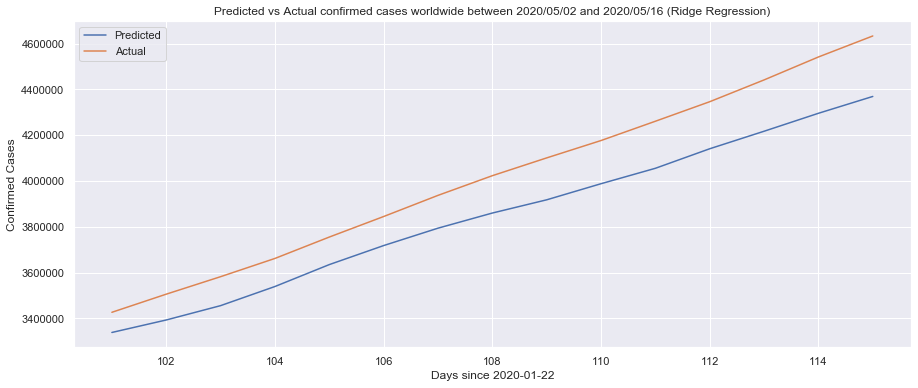

In [4]:
model = pickle.load(open('models/confirmed_ridge.p', 'rb'))
covid_02_05_16_05_confirmed_predictions_ridge = utils.predict_values(model, covid_02_05_16_05_test_confirmed, 'Confirmed')

utils.calc_metrics(covid_02_05_16_05['Confirmed'], covid_02_05_16_05_confirmed_predictions_ridge['Confirmed'])

predictions_grouped = covid_02_05_16_05_confirmed_predictions_ridge.groupby(['days_since'], as_index=False)['Confirmed'].sum()
actual_grouped = covid_02_05_16_05.groupby(['days_since'], as_index=False)['Confirmed'].sum()

fig = plt.figure(figsize=(15,6))
sb.lineplot(x='days_since', y='Confirmed', label='Predicted', data=predictions_grouped)
ax = sb.lineplot(x='days_since', y='Confirmed', label='Actual', data=actual_grouped)
ax = ax.set(xlabel='Days since 2020-01-22', ylabel='Confirmed Cases', title='Predicted vs Actual confirmed cases worldwide \
between 2020/05/02 and 2020/05/16 (Ridge Regression)')

For the number of confirmed cases, we can see that the absolute error between the 2 date intervals only incresed by a little over 2000. Considering the comparatively large number of confirmed cases, the model performed relatively well.

R2 Score:  0.859591030967412
Mean Absolute Error: 407.3924710438195
Mean Square Error 2609723.488615034


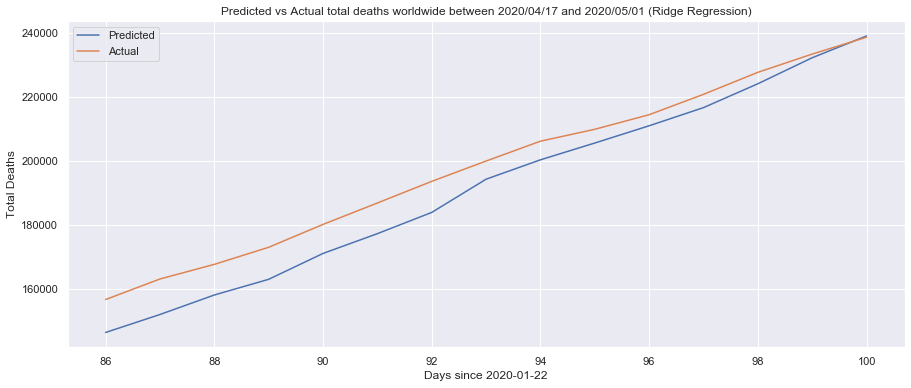

In [5]:
model = pickle.load(open('models/deaths_ridge.p', 'rb'))
covid_17_04_01_05_deaths_predictions_ridge = utils.predict_values(model, covid_17_04_01_05_test_deaths, 'Deaths')

utils.calc_metrics(covid_17_04_01_05['Deaths'], covid_17_04_01_05_deaths_predictions_ridge['Deaths'])

predictions_grouped = covid_17_04_01_05_deaths_predictions_ridge.groupby(['days_since'], as_index=False)['Deaths'].sum()
actual_grouped = covid_17_04_01_05.groupby(['days_since'], as_index=False)['Deaths'].sum()

fig = plt.figure(figsize=(15,6))
sb.lineplot(x='days_since', y='Deaths', label='Predicted', data=predictions_grouped)
ax = sb.lineplot(x='days_since', y='Deaths', label='Actual', data=actual_grouped)
ax = ax.set(xlabel='Days since 2020-01-22', ylabel='Total Deaths', title='Predicted vs Actual total deaths worldwide \
between 2020/04/17 and 2020/05/01 (Ridge Regression)')

R2 Score:  0.8748040073633494
Mean Absolute Error: 606.9555970071783
Mean Square Error 4536120.226458042


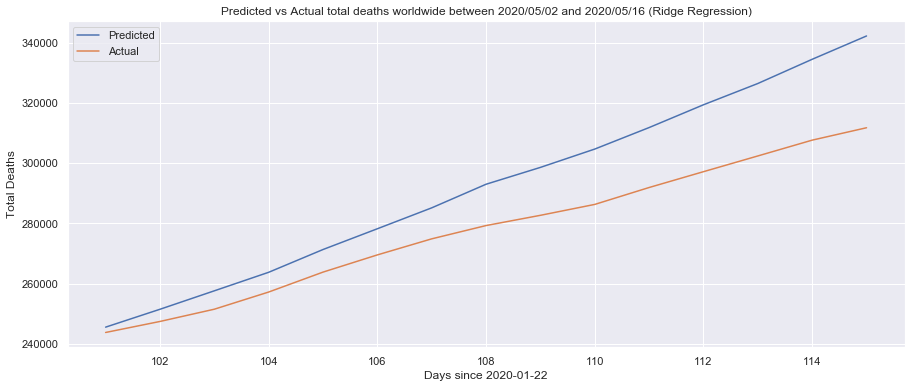

In [6]:
model = pickle.load(open('models/deaths_ridge.p', 'rb'))
covid_02_05_16_05_deaths_predictions_ridge = utils.predict_values(model, covid_02_05_16_05_test_deaths, 'Deaths')

utils.calc_metrics(covid_02_05_16_05['Deaths'], covid_02_05_16_05_deaths_predictions_ridge['Deaths'])

predictions_grouped = covid_02_05_16_05_deaths_predictions_ridge.groupby(['days_since'], as_index=False)['Deaths'].sum()
actual_grouped = covid_02_05_16_05.groupby(['days_since'], as_index=False)['Deaths'].sum()

fig = plt.figure(figsize=(15,6))
sb.lineplot(x='days_since', y='Deaths', label='Predicted', data=predictions_grouped)
ax = sb.lineplot(x='days_since', y='Deaths', label='Actual', data=actual_grouped)
ax = ax.set(xlabel='Days since 2020-01-22', ylabel='Total Deaths', title='Predicted vs Actual total deaths worldwide \
between 2020/05/02 and 2020/05/16 (Ridge Regression)')

For the number of deaths, the error is also small compared to the total number of deaths. For the 2020/05/02 to 2020/05/16 period, the model actually predicted the number of deaths to increase beyond the actual values, unlike what happened with the number of confirmed cases where the predictions always stayed below the actual values.

R2 Score:  0.5923800683961729
Mean Absolute Error: 1989.4815630623195
Mean Square Error 69951529.98285252


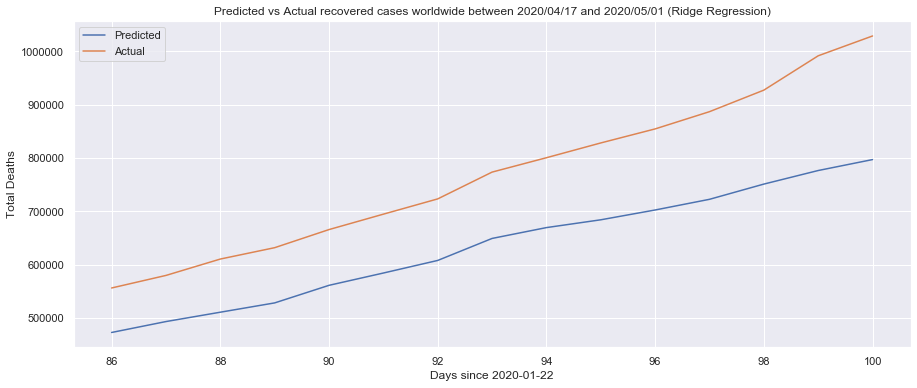

In [7]:
model = pickle.load(open('models/recovered_ridge.p', 'rb'))
covid_17_04_01_05_recovered_predictions_ridge = utils.predict_values(model, covid_17_04_01_05_test_recovered, 'Recovered')

utils.calc_metrics(covid_17_04_01_05['Recovered'], covid_17_04_01_05_recovered_predictions_ridge['Recovered'])

predictions_grouped = covid_17_04_01_05_recovered_predictions_ridge.groupby(['days_since'], as_index=False)['Recovered'].sum()
actual_grouped = covid_17_04_01_05.groupby(['days_since'], as_index=False)['Recovered'].sum()

fig = plt.figure(figsize=(15,6))
sb.lineplot(x='days_since', y='Recovered', label='Predicted', data=predictions_grouped)
ax = sb.lineplot(x='days_since', y='Recovered', label='Actual', data=actual_grouped)
ax = ax.set(xlabel='Days since 2020-01-22', ylabel='Total Deaths', title='Predicted vs Actual recovered cases worldwide \
between 2020/04/17 and 2020/05/01 (Ridge Regression)')

R2 Score:  0.6641892668465861
Mean Absolute Error: 3323.4849649646276
Mean Square Error 153136505.35158923


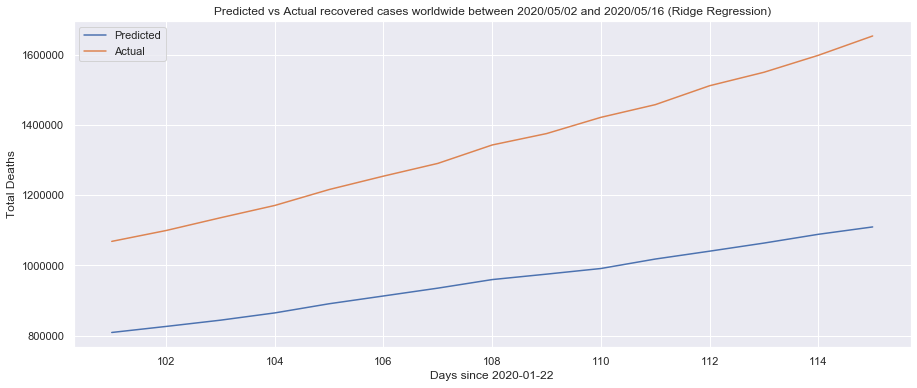

In [8]:
model = pickle.load(open('models/recovered_ridge.p', 'rb'))
covid_02_05_16_05_recovered_predictions_ridge = utils.predict_values(model, covid_02_05_16_05_test_recovered, 'Recovered')

utils.calc_metrics(covid_02_05_16_05['Recovered'], covid_02_05_16_05_recovered_predictions_ridge['Recovered'])

predictions_grouped = covid_02_05_16_05_recovered_predictions_ridge.groupby(['days_since'], as_index=False)['Recovered'].sum()
actual_grouped = covid_02_05_16_05.groupby(['days_since'], as_index=False)['Recovered'].sum()

fig = plt.figure(figsize=(15,6))
sb.lineplot(x='days_since', y='Recovered', label='Predicted', data=predictions_grouped)
ax = sb.lineplot(x='days_since', y='Recovered', label='Actual', data=actual_grouped)
ax = ax.set(xlabel='Days since 2020-01-22', ylabel='Total Deaths', title='Predicted vs Actual recovered cases worldwide \
between 2020/05/02 and 2020/05/16 (Ridge Regression)')

As for the number of recovered cases, the model didn't perform as well. The distance between the predicted and actual values is much higher than on the number of confirmed cases and deaths. In this case, the model predicted the number of recovered cases to be much lower than the actual values.
In all cases above, we can clearly see that it becomes increasingly harder for the model to predict values as the date increases.